In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv('train_loanprediction.csv')

# Display the first few rows of the dataset
print(data.head())

# Display summary statistics
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Fill missing values for numerical columns with mean
numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    data[col].fillna(data[col].mean(), inplace=True)

# Fill missing values for categorical columns with mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Display the first few rows of the transformed dataset
print(data.head())

# Export cleaned and encoded data
data.to_csv('cleaned_and_encoded_loan_data.csv', index=False)



    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

In [10]:
specific_column = data['Credit_History'].value_counts()

print(specific_column)

Credit_History
1.000000    475
0.000000     89
0.842199     50
Name: count, dtype: int64


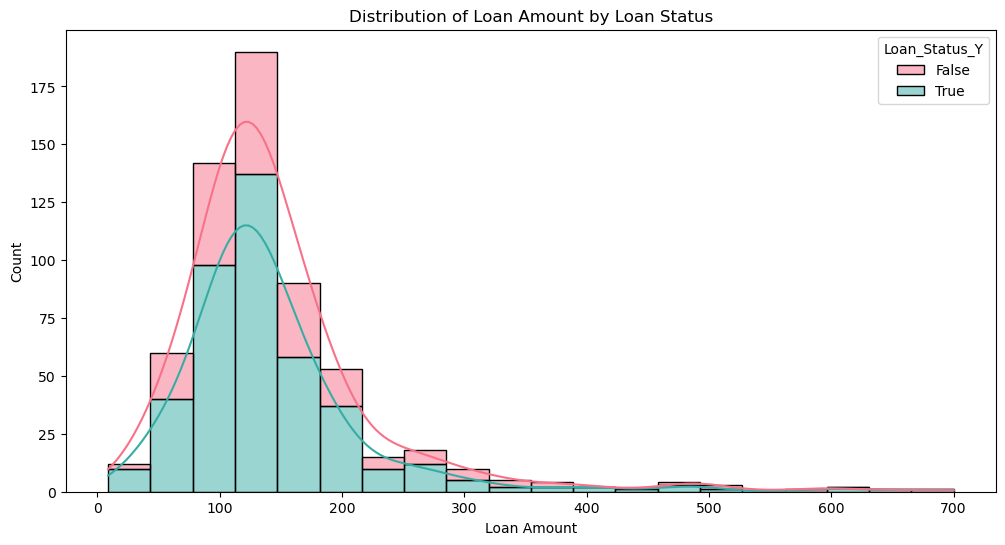

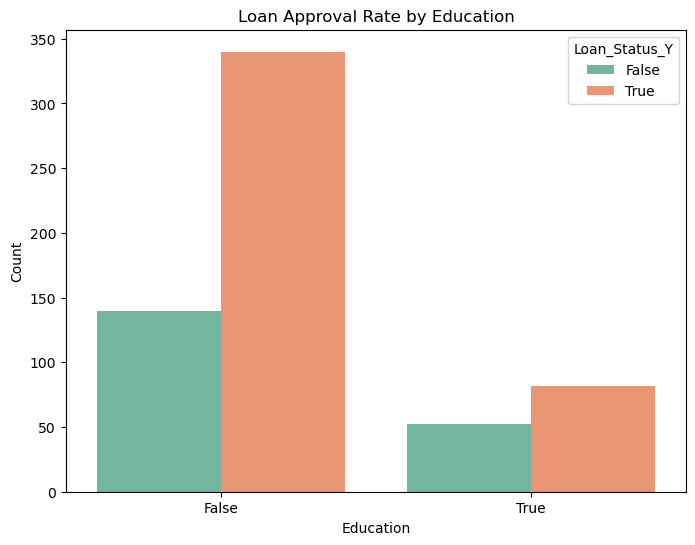

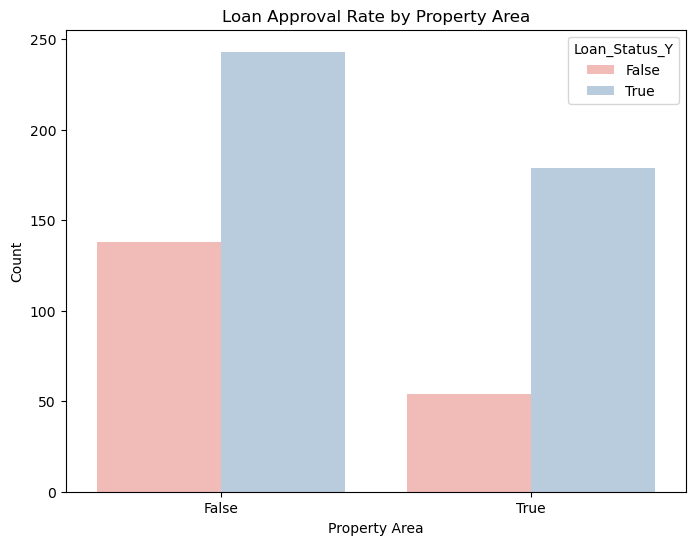

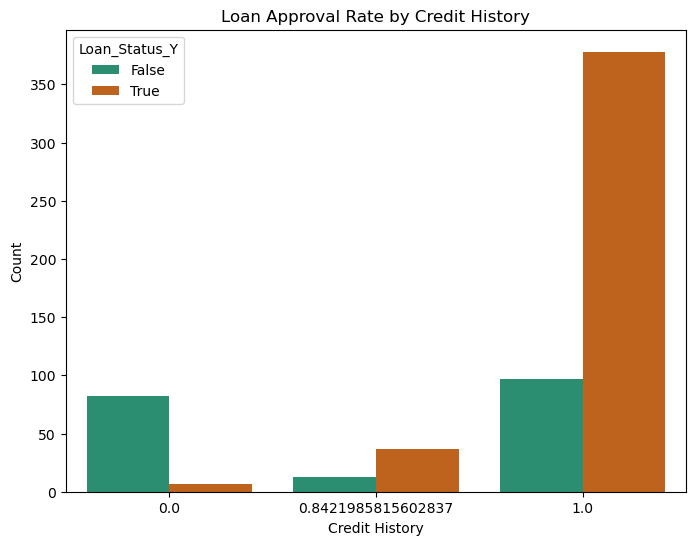

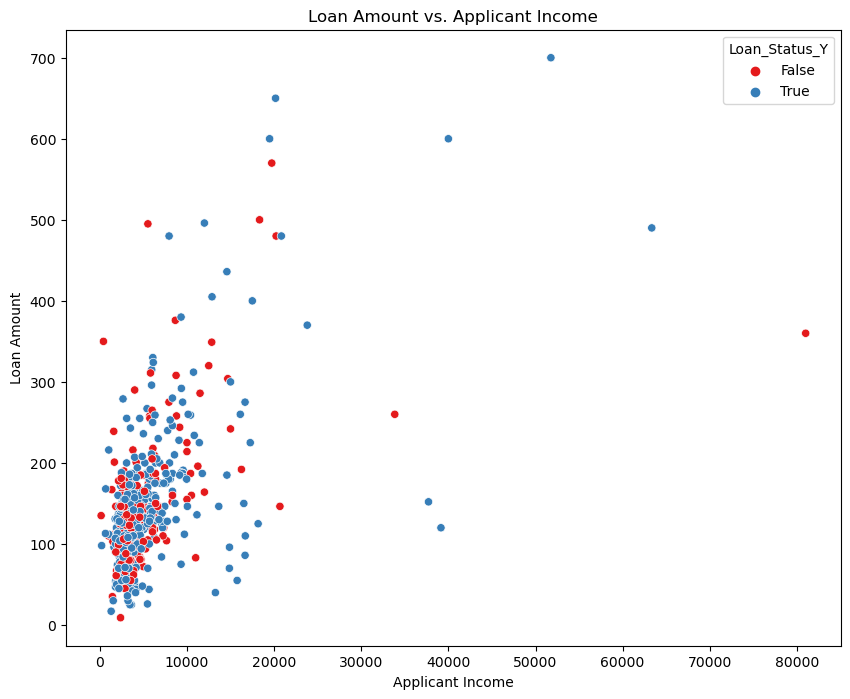

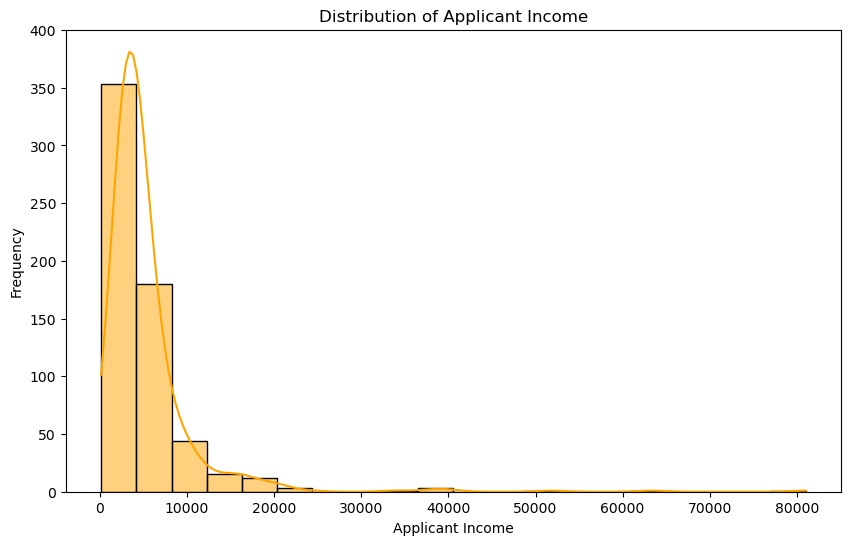

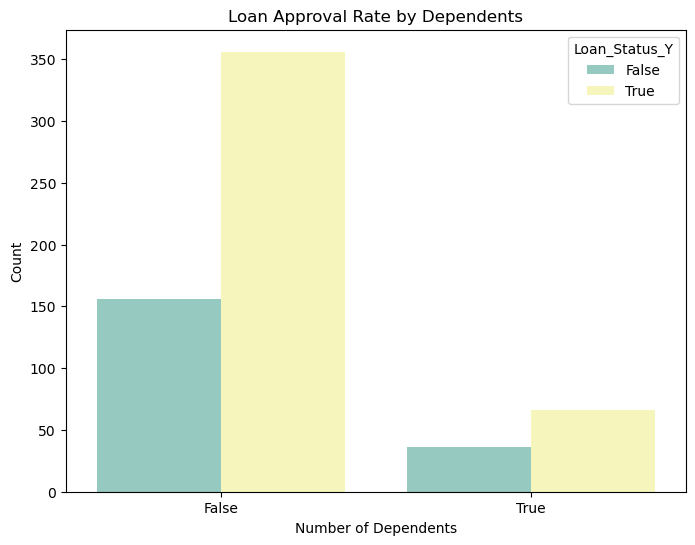

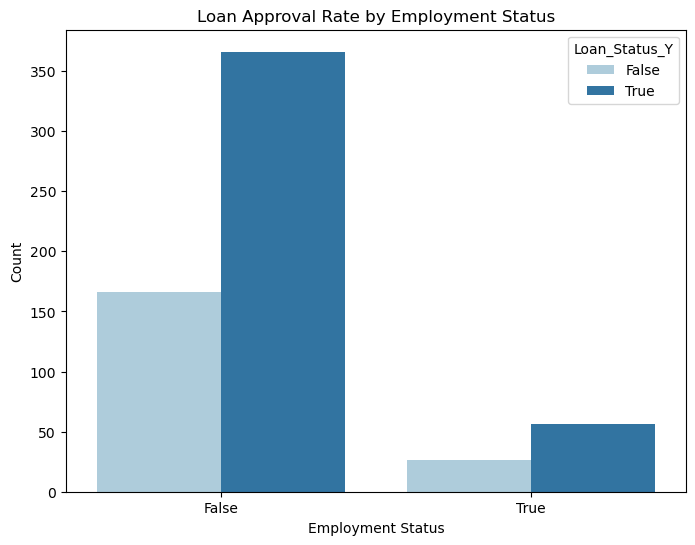

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned and encoded dataset
data = pd.read_csv('cleaned_and_encoded_loan_data.csv')

# Visualize distribution of Loan Amount by Loan Status
plt.figure(figsize=(12, 6))
sns.histplot(data, x='LoanAmount', hue='Loan_Status_Y', bins=20, kde=True, palette='husl', multiple='stack')
plt.title('Distribution of Loan Amount by Loan Status')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.show()

# Visualize Loan Approval Rate by Education
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Education_Not Graduate', hue='Loan_Status_Y', palette='Set2')
plt.title('Loan Approval Rate by Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

# Visualize Loan Approval Rate by Property Area
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Property_Area_Semiurban', hue='Loan_Status_Y', palette='Pastel1')
plt.title('Loan Approval Rate by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()

# Visualize Loan Approval Rate by Credit History
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Credit_History', hue='Loan_Status_Y', palette='Dark2')
plt.title('Loan Approval Rate by Credit History')
plt.xlabel('Credit History')
plt.ylabel('Count')
plt.show()

# Visualize Loan Amount vs. Applicant Income
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='ApplicantIncome', y='LoanAmount', hue='Loan_Status_Y', palette='Set1')
plt.title('Loan Amount vs. Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()

# Visualize Applicant Income Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['ApplicantIncome'], bins=20, kde=True, color='orange')
plt.title('Distribution of Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Frequency')
plt.show()

# Visualize Loan Approval Rate by Dependents
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Dependents_1', hue='Loan_Status_Y', palette='Set3')
plt.title('Loan Approval Rate by Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Count')
plt.show()

# Visualize Loan Approval Rate by Employment Status
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Self_Employed_Yes', hue='Loan_Status_Y', palette='Paired')
plt.title('Loan Approval Rate by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.show()


Accuracy: 0.7804878048780488
Classification Report: 
              precision    recall  f1-score   support

       False       0.90      0.42      0.57        43
        True       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



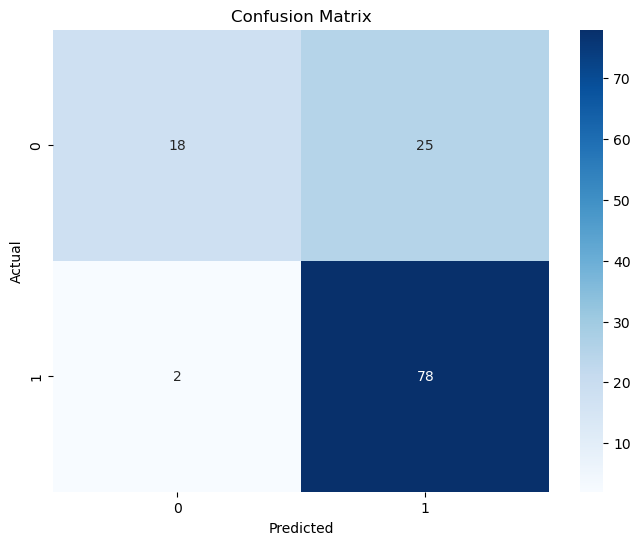

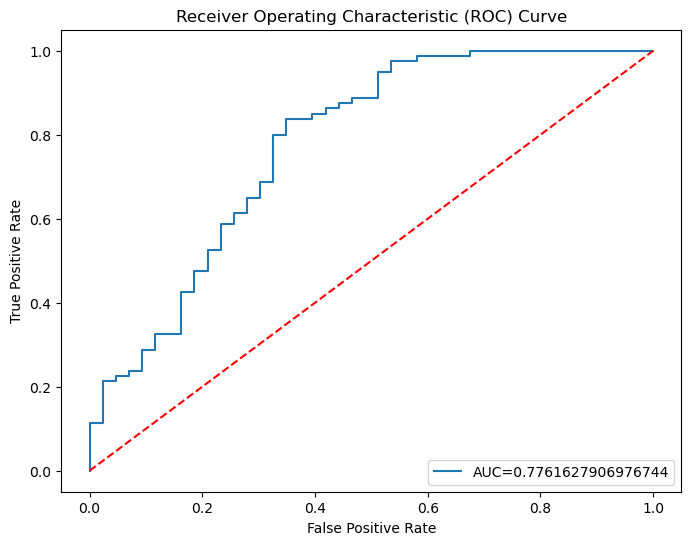

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned and encoded dataset
data = pd.read_csv('cleaned_and_encoded_loan_data.csv')

# Define features and target
X = data.drop('Loan_Status_Y', axis=1)
y = data['Loan_Status_Y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Logistic Regression classifier
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Predict on the test set
y_pred = lr.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report: \n{report}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot ROC Curve
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
auc_value = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label="AUC="+str(auc_value))
plt.plot([0, 1], [0, 1], linestyle='--', color='red')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc=4)
plt.show()
